In [101]:
import pandas as pd
# Load the CSV data into a DataFrame

df=pd.read_csv("D:\wgu\D214\Data\CombineYearsData.csv")






# Printing the length of each dataframe
print(len(df,))
print(df.shape)
print(df.head())


2077
(2077, 2)
  Day        Revenue
0  1/1/2018     0.00
1  1/2/2018   115.27
2  1/3/2018    42.70
3  1/4/2018   245.53
4  1/5/2018    53.43


In [102]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for outliers using descriptive statistics
statistics = df.describe()
print("\nDescriptive Statistics:")
print(statistics)

# Detect and print potential outliers
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Revenue'] < Q1 - 1.5 * IQR) | (df['Revenue'] > Q3 + 1.5 * IQR)]
print("\nPotential Outliers:")
print(outliers)

Missing Values:
Day          0
Revenue      0
dtype: int64

Descriptive Statistics:
           Revenue
count  2077.000000
mean    162.163693
std     225.463971
min       0.000000
25%       0.000000
50%      74.710000
75%     240.190000
max    1606.070000

Potential Outliers:
       Day        Revenue
75     3/17/2018   614.85
121     5/2/2018   619.45
271    9/29/2018   807.02
312    11/9/2018   600.96
324   11/21/2018   609.07
...          ...      ...
2058  10/14/2023   918.46
2062  10/18/2023   705.95
2067  10/23/2023   627.68
2070  10/26/2023   752.41
2072  10/28/2023  1035.97

[117 rows x 2 columns]


In [103]:
# pip install matplotlib pandas


In [104]:
print(df.columns)


Index(['Day      ', 'Revenue'], dtype='object')


In [105]:
# Strip trailing spaces from the column names
df.columns = df.columns.str.strip()

#df['date'] = pd.to_datetime(df['Day'])
#df.set_index('date', inplace=True)

print(df.columns)


Index(['Day', 'Revenue'], dtype='object')


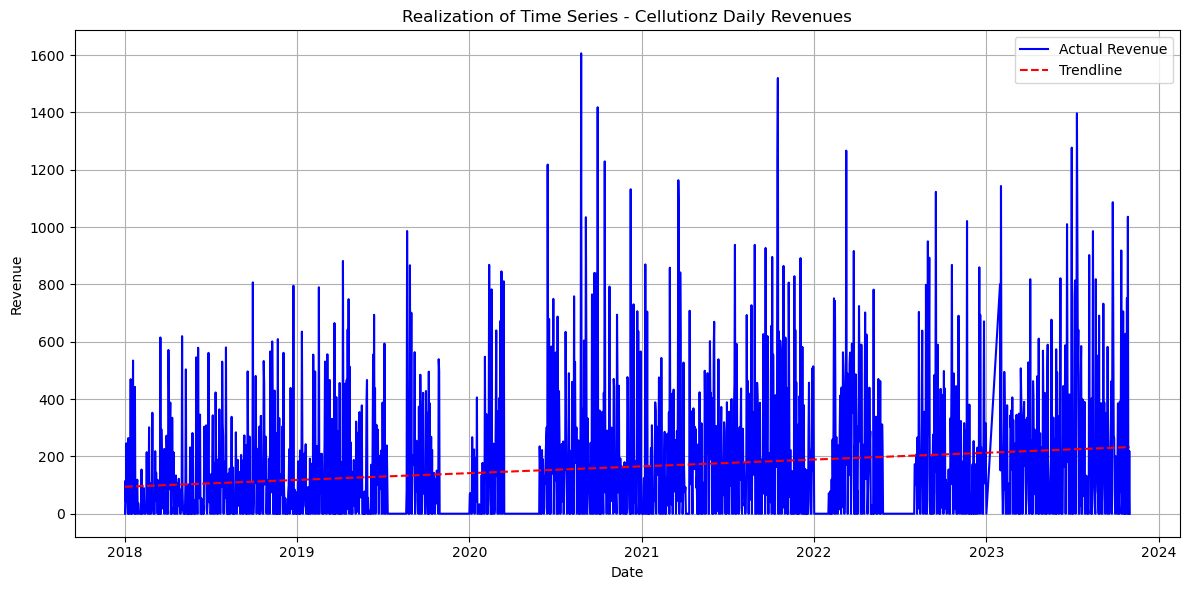

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import statsmodels.api as sm

# Convert 'Day' to a datetime index(Datetime Conversion)



df['date'] = pd.to_datetime(df['Day'])

# Set Index: converts the 'Day' column to a datetime data type and assigns it to a new column 'date' in the dataframe.
# sets the 'date' column as the dataframe's index, which is necessary for our  time series analysis.

df.set_index('date', inplace=True)

# The df.set_index('date', inplace=True) operation sets the 'date' column as the new index of the dataframe.
# This means that instead of the default numeric index (0, 1, 2, ...), our dataframe
# will now use the 'date' column as the index.
# So we creates a new column ('date') in the dataframe and sets this new column as the index, 
# effectively changing the index from a normal numeric index to a datetime index.

# Figure Size: X and  Y dictate a wide graph figure
plt.figure(figsize=[12,6])

# Plot time series data: plots the 'Revenue' column against the datetime index
plt.plot(df.index, df['Revenue'], label='Actual Revenue', color='b')

# Generate trend line
x = mdates.date2num(df.index) # convertsthe datetime index into to numeric format
y = df['Revenue']
z = np.polyfit(x, y, 1)# determine the coefficients of the linear trend line that best fits the data.
p = np.poly1d(z)

# Plot trendline
plt.plot(df.index, p(x), "r--", label='Trendline')#  generated trend line as a red dashed line

# Prettify the graph
plt.title('Realization of Time Series - Cellutionz Daily Revenues') # Sets the title of the graph
plt.xlabel('Date') #Label the x-axis 
plt.ylabel('Revenue') #Label the y-axis 
plt.legend()         # Displays the legend
plt.grid(True)      # Adds a grid to the graph
plt.tight_layout()  # Adjusts the layout to fit the figure's content

plt.show()          # Show Graph

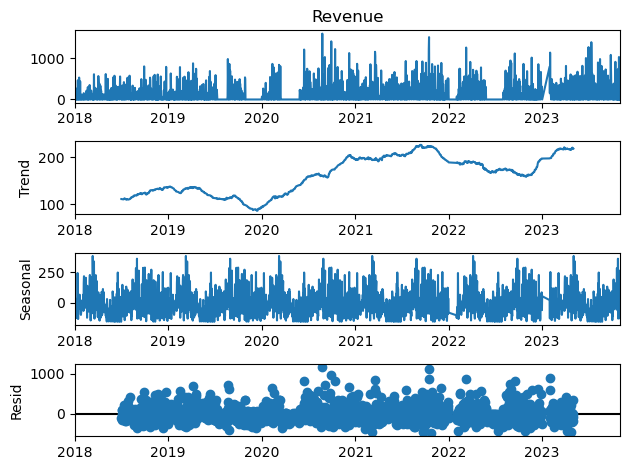

In [46]:
######################################### Visual Inspection Seasonal Decomposition #############################################
import statsmodels.api as sm


# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(df['Revenue'], model='additive', period=365)  #  daily data with annual seasonality
# model='additive': Specifies that an additive decomposition should be performed, where the observed data is considered
    # as the sum of the trend, seasonal, and residual components.
    # Additive shouse line on the plot if there is no seasonality.
    
# Plot the decomposition results
fig = decomposition.plot()
# generates a plot of the decomposition results, including the observed data, trend, seasonal component, and residual component.
plt.show()

# displays the decomposition plot.

In [47]:
#df.info()
df.shape
df.head

<bound method NDFrame.head of                    Day  Revenue
date                           
2018-01-01    1/1/2018     0.00
2018-01-02    1/2/2018   115.27
2018-01-03    1/3/2018    42.70
2018-01-04    1/4/2018   245.53
2018-01-05    1/5/2018    53.43
...                ...      ...
2023-10-28  10/28/2023  1035.97
2023-10-29  10/29/2023     0.00
2023-10-30  10/30/2023     0.00
2023-10-31  10/31/2023   218.81
2023-11-01   11/1/2023     0.00

[2077 rows x 2 columns]>

In [82]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


# Define a function to perform the ADF test and interpret the results
def adf_test(series):
    adf_result = adfuller(series, autolag='AIC')
    adf_pvalue = adf_result[1]
    print("Augmented Dickey-Fuller (ADF) Test:")
    print(f"ADF p-value: {adf_pvalue}")
    if adf_pvalue <= 0.05:
        print("ADF Test Result: The time series is likely stationary.")
    else:
        print("ADF Test Result: The time series is likely non-stationary.")

# Perform ADF test on the 'Revenue' column
time_series = df['Revenue']

# Perform the ADF test 
adf_test(time_series)

Augmented Dickey-Fuller (ADF) Test:
ADF p-value: 1.2057447873667594e-06
ADF Test Result: The time series is likely stationary.


In [83]:
# Ratio Selection,  80% for training and 20% for testing .


# Calculate the split point
split_point = int(0.8 * len(df))

# Split the data into training and test sets

train_data = df.iloc[:split_point]
test_data = df.iloc[split_point:]
#train_data.shape
#test_data.shape
# Print the shapes of the training and test sets
print("Shape of the training data:", train_data.shape)
print("Shape of the test data:", test_data.shape)

Shape of the training data: (1661, 2)
Shape of the test data: (416, 2)


In [84]:
# Save training data to a CSV file
train_data.to_csv("D:\\wgu\\D214\\Data\\train_data.csv", index=False)

# Save test data to a CSV file
test_data.to_csv("D:\\wgu\\D214\\Data\\test_data.csv", index=False)


# We plan to continue working with time series models : ARIMA,
# it's often a good practice to exclude the index when saving to CSV (index=False)
# and then set the datetime index again when we read the data back.
# This ensures consistency in our workflow and avoids potential issues related to the index column.


In [85]:
from scipy import signal

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

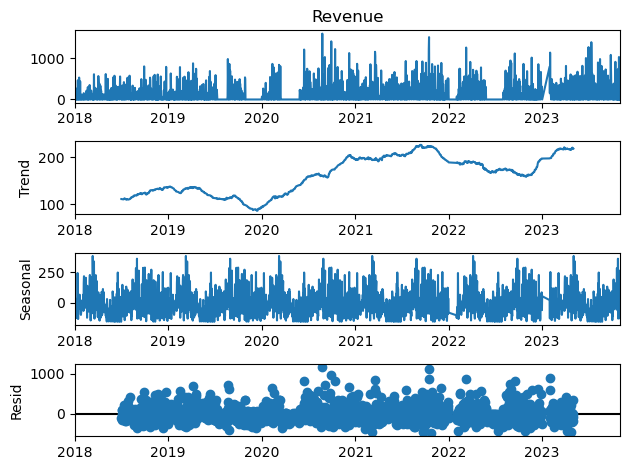

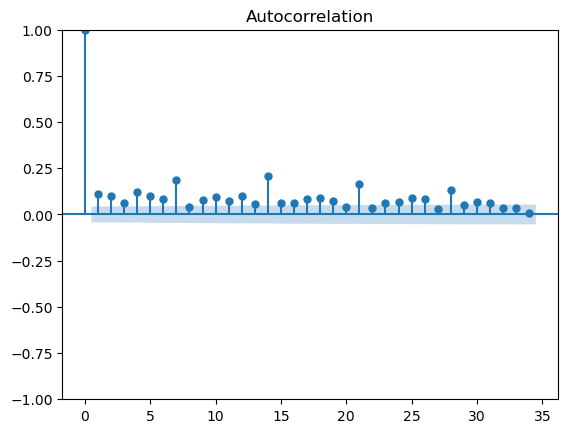

In [86]:
# Step 1: Data Analysis
# Seasonal Decomposition
decomposition = seasonal_decompose(df['Revenue'], model='additive', period=365)  # Assuming daily data with annual seasonality
decomposition.plot()
plt.show()

# Autocorrelation Function (ACF)
plot_acf(df['Revenue'])
plt.show()

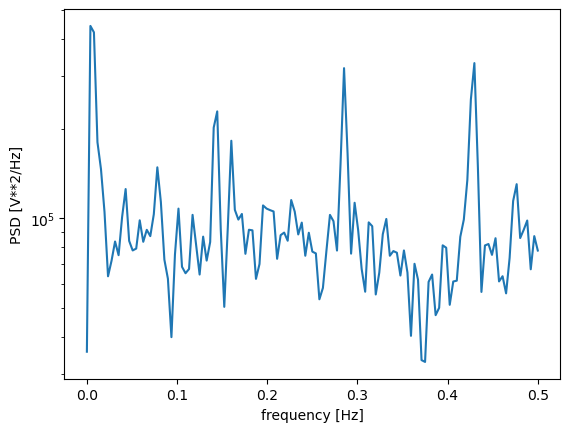

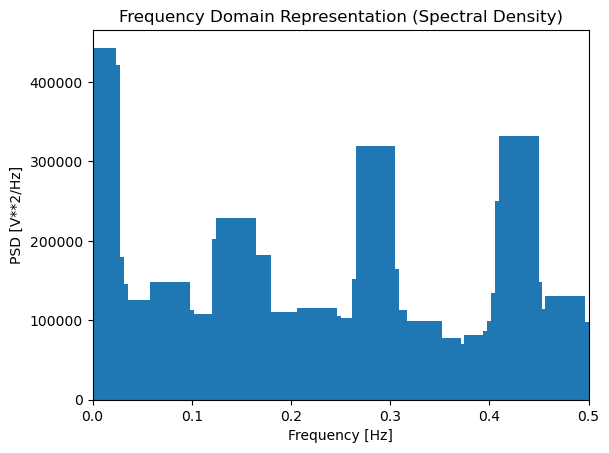

In [87]:
##########################  •   the spectral density 

# Spectral Density Plot
f, Pxx_den = signal.welch(df['Revenue'])
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()






# Create a bar graph for the frequency domain
plt.bar(f, Pxx_den, width=0.04)  # Adjust the width as needed
plt.title('Frequency Domain Representation (Spectral Density)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim(0, max(f))  # Set the x-axis limit to the maximum frequency

plt.show()

<Figure size 1200x600 with 0 Axes>

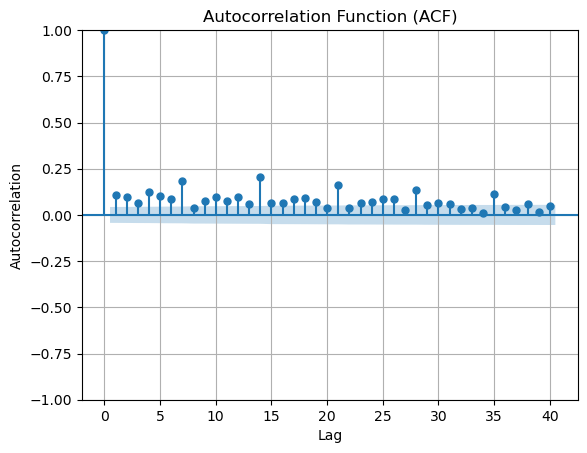

C:\Users\Cellutionz\AppData\Local\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

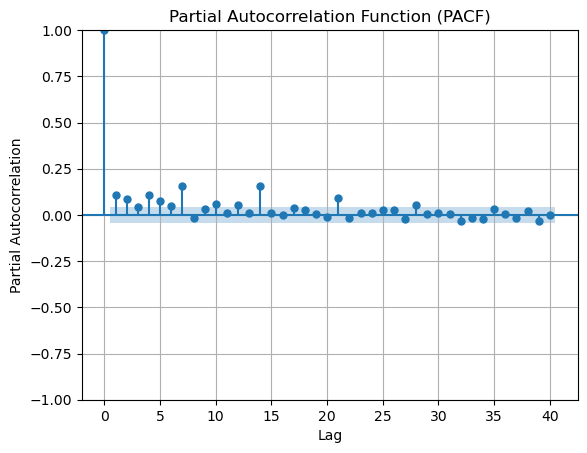

In [88]:
#####################        the autocorrelation function 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your time series data into a DataFrame (replace 'your_data.csv' with your actual data file)
#df = pd.read_csv(r"D:\wgu\D213\Data\teleco_time_series .csv")


ts = df['Revenue']

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(ts, lags=40)  # You can adjust the 'lags' parameter based on your dataset
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(ts, lags=40)  # You can adjust the 'lags' parameter based on your dataset
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()     
        

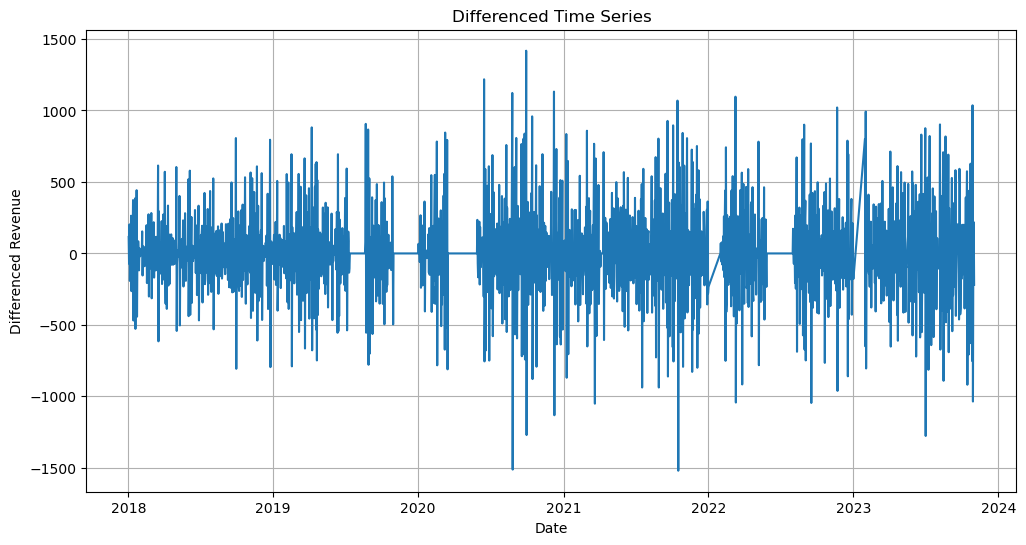

ADF Statistic: -14.075614897714475
p-value: 2.888433820902303e-26
Critical Values: {'1%': -3.4335454666709335, '5%': -2.8629516036655955, '10%': -2.56752147433511}
The series is stationary.


In [89]:
########################## we can use the ADF test and visualize the differenced time series #############
from statsmodels.tsa.stattools import adfuller

ts = df['Revenue']

# Perform differencing
ts_diff = ts.diff().dropna()

# Plot differenced time series
plt.figure(figsize=(12, 6))
plt.plot(ts_diff)
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Revenue')
plt.grid(True)
plt.show()

# ADF test
result = adfuller(ts_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

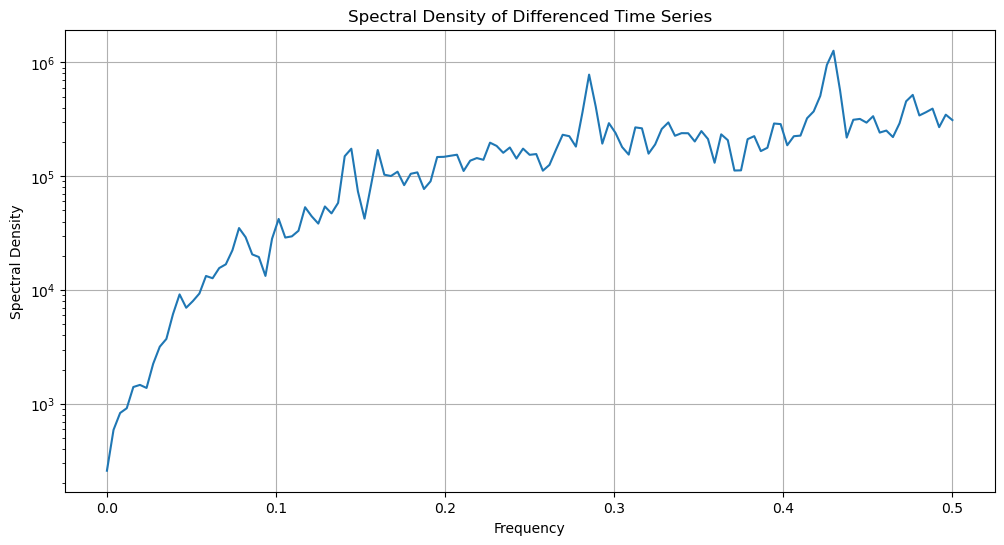

In [90]:
##########################  •   the spectral density 

from scipy.signal import welch

# Compute the spectral density using Welch's method
frequencies, spectrum = welch(ts_diff.dropna(), fs=1.0)

plt.figure(figsize=(12, 6))
plt.semilogy(frequencies, spectrum)
plt.title('Spectral Density of Differenced Time Series')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.grid(True)
plt.show()

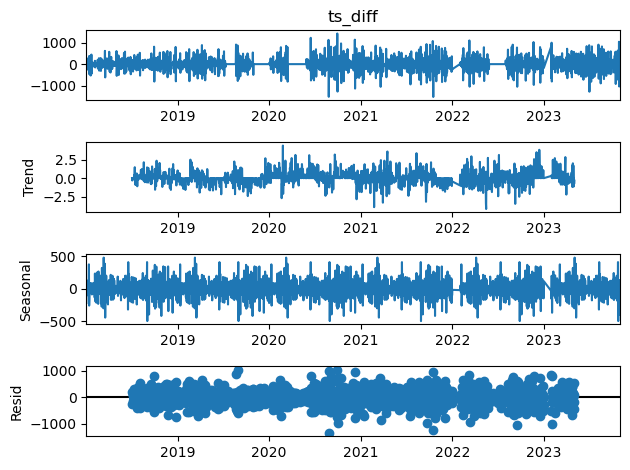

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Load the dataset
#df = pd.read_csv(r"D:\wgu\D213\Data\teleco_time_series .csv")

# 2. Convert the 'Day' column to datetime format
#df['date'] = pd.to_datetime(df['Day'])

# 3. Set the 'date' column as the index
#df.set_index('date', inplace=True)

# 4. Drop the original 'Day' column if needed
if 'Day' in df.columns:
    df.drop(columns='Day', inplace=True)

# Calculate the differenced time series
df['ts_diff'] = df['Revenue'].diff()
df.dropna(inplace=True)  # Drop NaN values after differencing

# Decompose the differenced time series data
decomp_diff = seasonal_decompose(df['ts_diff'], model='additive', period=365)

# Plot the decomposed components of differenced series
decomp_diff.plot()
plt.show()

In [ ]:
#  break down the code to provide separate plots for each of the components:
#  trend, seasonality, and residuals.

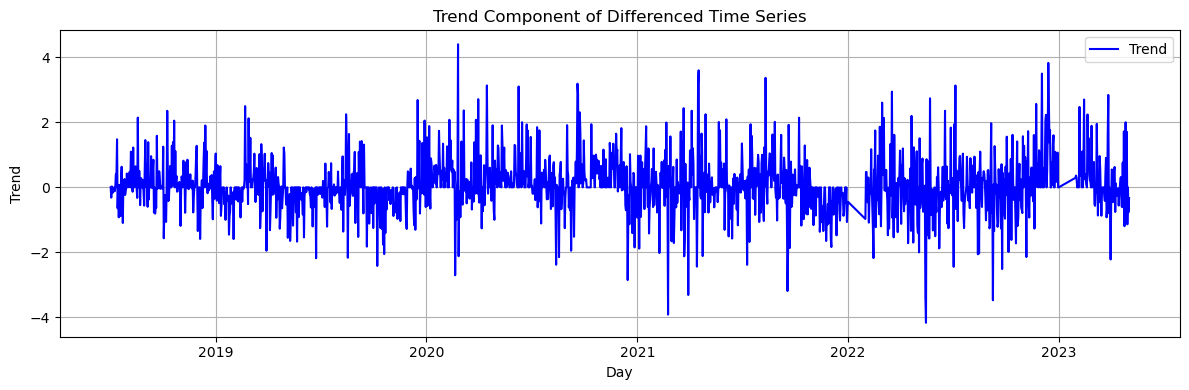

In [69]:
# Plot the trend component of the differenced series
plt.figure(figsize=(12, 4))
plt.plot(df.index, decomp_diff.trend, color='b', label='Trend')
plt.title('Trend Component of Differenced Time Series')
plt.xlabel('Day')
plt.ylabel('Trend')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

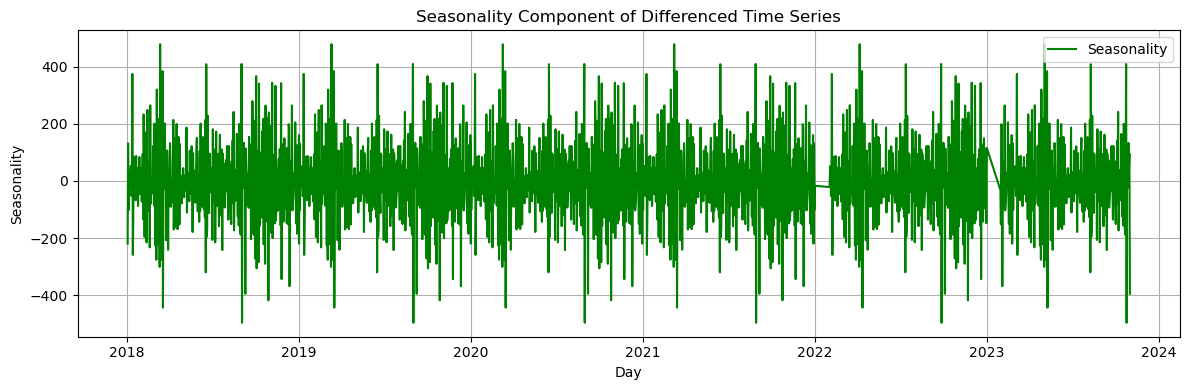

In [70]:
# Plot the seasonality component of the differenced series
plt.figure(figsize=(12, 4))
plt.plot(df.index, decomp_diff.seasonal, color='g', label='Seasonality')
plt.title('Seasonality Component of Differenced Time Series')
plt.xlabel('Day')
plt.ylabel('Seasonality')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


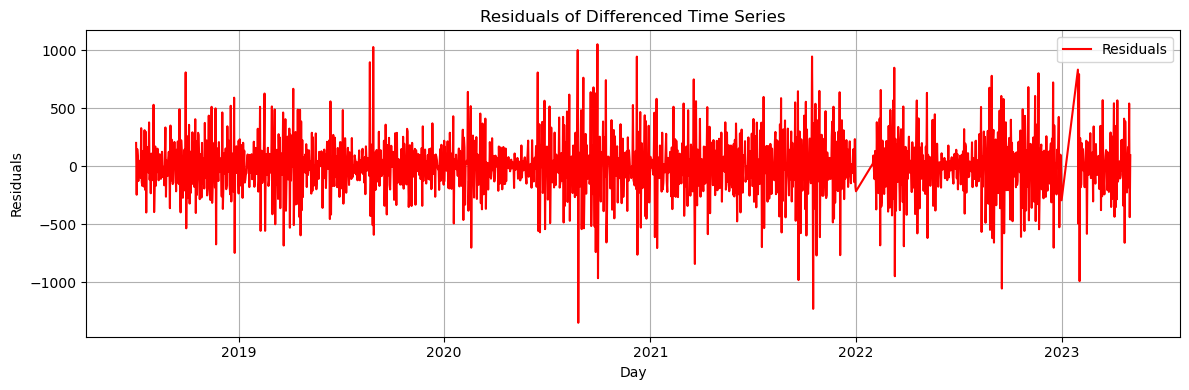

In [71]:
# Plot the residuals of the differenced series
plt.figure(figsize=(12, 4))
plt.plot(df.index, decomp_diff.resid, color='r', label='Residuals')
plt.title('Residuals of Differenced Time Series')
plt.xlabel('Day')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#pip install pmdarima


In [ ]:
# auto ARIMA is that it automatically handles differencing and determines the appropriate orders for differencing (d) based on the input data.

# Auto ARIMA can work with non-stationary data and will internally identify the differencing order (d) and other ARIMA orders (p and q) that are needed to make the data stationary.

In [91]:
################ Apply Auto ARIMA to find the appropriate values for p, d, and q

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import warnings

# Read the training data from the CSV file and set the 'Day' column as the datetime index
train_data = pd.read_csv("D:\\wgu\\D214\\Data\\train_data.csv")
train_data['Day'] = pd.to_datetime(train_data['Day'])  #
train_data.set_index('Day', inplace=True)

# Apply Auto ARIMA to find the appropriate values for p, d, and q

autoarima_model = auto_arima(train_data['Revenue'],   trace=True,  error_action='ignore', suppress_warnings=True)

# Get the best-fitting ARIMA orders

best_p, best_d, best_q = autoarima_model.order

print(f"Best ARIMA Order (p, d, q): ({best_p}, {best_d}, {best_q})")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22432.924, Time=1.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23500.688, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23011.358, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22427.412, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23498.689, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22429.092, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=22429.092, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22430.243, Time=1.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=22425.412, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=22427.093, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=22427.092, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=23009.358, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=22428.243, Time=0.57 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.247 seconds
Best ARIM

In [92]:
import warnings


from statsmodels.tsa.arima.model import ARIMA

#  the ARIMA model best fitting ARIMA 
model = ARIMA(train_data['Revenue'], order=(0, 1, 1)) # best fitting ARIMA 
model_fit = model.fit()
# the summary of the model fit result
print(model_fit.summary())

C:\Users\Cellutionz\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Cellutionz\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Cellutionz\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                 1661
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -11210.706
Date:                Wed, 15 Nov 2023   AIC                          22425.412
Time:                        12:42:04   BIC                          22436.241
Sample:                             0   HQIC                         22429.426
                               - 1661                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9427      0.008   -121.783      0.000      -0.958      -0.928
sigma2      4.295e+04    756.266     56.790      0.000    4.15e+04    4.44e+04
Ljung-Box (L1) (Q):                   0.29   Jarque-

In [ ]:
# Fit the ARIMA(2,1,0)(0,0,0)[0] model
model_1 = ARIMA(train_data['Revenue'], order=(2, 1, 0))
model_fit_1 = model_1.fit()
# Fit the ARIMA(1,1,1)(0,0,0)[0] model
model_2 = ARIMA(train_data['Revenue'], order=(1, 1, 1))
model_fit_2 = model_2.fit()
# the summary of the model fit result
# Print the summary of the model fit results
print("Model 1 Summary:")
print(model_fit_1.summary())

print("\nModel 2 Summary:")
print(model_fit_2.summary())

In [93]:
# Calculate the residuals (prediction errors)
residuals = train_data['Revenue'] - model_fit.fittedvalues

# Calculate the RSS
rss = (residuals ** 2).sum()

print(f"Residual Sum of Squares (RSS): {rss:.2f}")
# A lower RSS indicates a better fit of the model to the data. 

Residual Sum of Squares (RSS): 71322855.52


In [ ]:
################################### # Perform Forecasting:


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22432.924, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23500.688, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23011.358, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22427.412, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23498.689, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22429.092, Time=0.70 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=22429.092, Time=0.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22430.243, Time=1.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=22425.412, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=22427.093, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=22427.092, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=23009.358, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=22428.243, Time=0.57 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.591 seconds


C:\Users\Cellutionz\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Cellutionz\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Cellutionz\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Cellutionz\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given wit

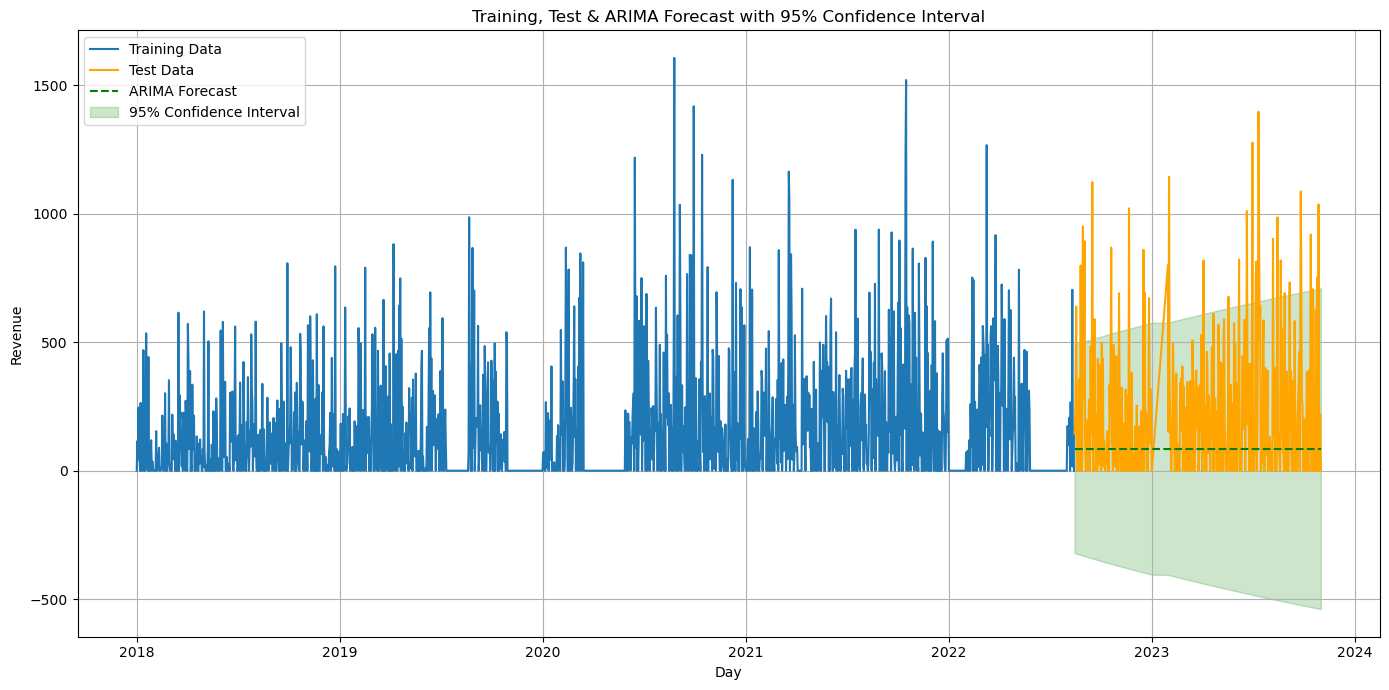

In [94]:
# Load your data
train_data = pd.read_csv("D:\\wgu\\D214\\Data\\train_data.csv", index_col='Day', parse_dates=True)
test_data = pd.read_csv("D:\\wgu\\D214\\Data\\test_data.csv", index_col='Day', parse_dates=True)

# Apply Auto ARIMA to find the appropriate values for p, d, and q
autoarima_model = auto_arima(train_data['Revenue'], trace=True, error_action='ignore', suppress_warnings=True)
best_p, best_d, best_q = autoarima_model.order

# Fit ARIMA model using the best p, d, q
model = ARIMA(train_data['Revenue'], order=(best_p, best_d, best_q))
model_fit = model.fit()
############### the forecast's predicted mean and the confidence interval on the length of test data.
###### the code will calculate the ARIMA forecast's predicted mean and 95% confidence interval,
# Forecast for the length of test data
forecast_obj = model_fit.get_forecast(steps=len(test_data))
forecast_mean = forecast_obj.predicted_mean
forecast_conf_int = forecast_obj.conf_int(alpha=0.05)

# Plotting function with ARIMA forecast and confidence interval
def plot_func_arima(train_data, test_data, forecast_data, conf_int, title):
    plt.figure(figsize=(14, 7))
    plt.plot(train_data.index, train_data['Revenue'], label='Training Data')
    plt.plot(test_data.index, test_data['Revenue'], label='Test Data', color='orange')
    plt.plot(test_data.index, forecast_data, linestyle='--', label='ARIMA Forecast', color='green')
    plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.2, label='95% Confidence Interval')
    plt.title(title)
    plt.xlabel('Day')
    plt.ylabel('Revenue')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting
plot_func_arima(train_data, test_data, forecast_mean, forecast_conf_int, 'Training, Test & ARIMA Forecast with 95% Confidence Interval')


In [95]:
# ################################################Model Evaluation:

# Mean Absolute Error (MAE): Represents the average of the absolute differences between the predicted and actual values. It provides a straightforward indication of forecast accuracy.
#Root Mean Squared Error (RMSE): Emphasizes larger errors over smaller errors. It’s more sensitive to outliers than MAE.
#Mean Absolute Percentage Error (MAPE): Represents the error as a percentage. Useful when you want to understand the error in terms of the relative size.


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_data['Revenue'], forecast_mean)
rmse = np.sqrt(mean_squared_error(test_data['Revenue'], forecast_mean))
mape = np.mean(np.abs((test_data['Revenue'] - forecast_mean) / test_data['Revenue'])) * 100
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 192.60
RMSE: 290.41
MAPE: nan%


C:\Users\Cellutionz\AppData\Local\Temp\ipykernel_5724\2542001831.py:13: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test_data['Revenue'] - forecast_mean) / test_data['Revenue'])) * 100


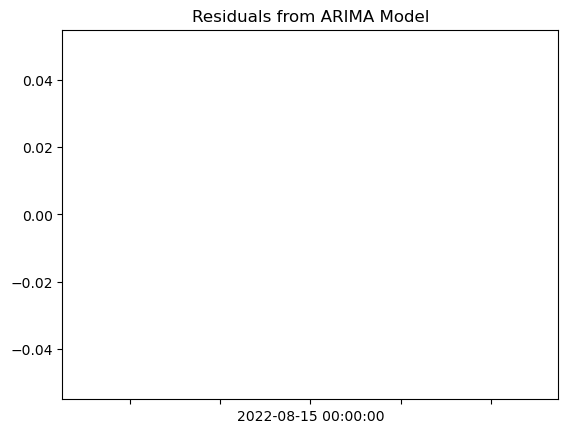

In [96]:
# Residual Analysis:




residuals = test_data['Revenue'] - forecast_mean
residuals.plot(title='Residuals from ARIMA Model')
plt.show()

In [ ]:
###############  Ensemble Methods

In [99]:
# Assuming you have a time series dataset and 'df' is your DataFrame
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (example: ARIMA(0,1,1))
model_arima = ARIMA(df['Revenue'], order=(0, 1, 1))
model_arima_fit = model_arima.fit()

# Predictions
predictions_arima = model_arima_fit.forecast(steps=len(test_data))


C:\Users\Cellutionz\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Cellutionz\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Cellutionz\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Cellutionz\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given wit

In [109]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sample Data (replace with your dataset)

import pandas as pd
# Load the CSV data into a DataFrame

df=pd.read_csv("D:\wgu\D214\Data\CombineYearsData.csv")

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Revenue'].values.reshape(-1,1))

# Function to create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length), 0]
        y = data[i+seq_length, 0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Sequence length
seq_length = 5  # This is a hyperparameter

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshaping input for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [111]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Revenue'].values.reshape(-1,1))

# Prepare data for LSTM (this might require reshaping, depending on your data)

# Define and fit LSTM model (this is a simple example)
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, y_train, epochs=1, batch_size=1)

# Predictions
predictions_lstm = model_lstm.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)  # re


13/13 [==============================] - 1s 5ms/step
